# Mnist
```
MNIST 데이터베이스 (Modified National Institute of Standards and Technology database)는 손으로 쓴 숫자들로 이루어진 대형 데이터베이스이며, 다양한 화상 처리 시스템을 트레이닝하기 위해 일반적으로 사용된다
```

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
plt.style.use("ggplot")

In [41]:
mnistData = load_data()

In [42]:
mnistData

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [43]:
(x_train,y_train),(x_test,y_test) = mnistData

In [44]:
x_train.shape,x_test.shape,y_test.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

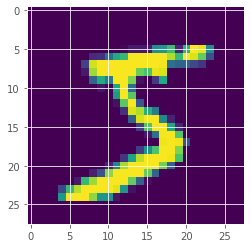

In [45]:
plt.imshow(x_train[0])   # [면, 행, 열]
plt.show()

In [46]:
y_train[0]

5

In [47]:
y_train  # y값을 인코딩해야함.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [48]:
y_trainOne = to_categorical(y_train)
y_trainOne

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [49]:
x_train.shape

(60000, 28, 28)

In [50]:
x_trainM = x_train.reshape(60000,-1, )  # 2차원으로 변경
x_trainM.shape

(60000, 784)

In [51]:
model = Sequential()
model.add(Dense(units=64, input_dim = 784, activation='relu' )  )
model.add(Dense(units=32, input_dim = 64, activation='relu' )  )
model.add(Dense(units=10, input_dim = 32, activation='softmax' )  )

model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_trainM, y_trainOne,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7601 - acc: 0.7363
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4358 - acc: 0.8830
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2802 - acc: 0.9245
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2080 - acc: 0.9428
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1746 - acc: 0.9530
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1526 - acc: 0.9584
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1358 - acc: 0.9627
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1294 - acc: 0.9656
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1166 - acc: 0.9675
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1055 - acc: 0.9713


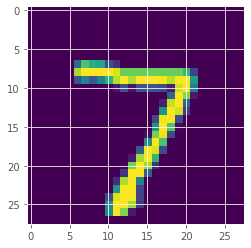

In [52]:
plt.imshow(x_test[0])

In [53]:
x_test[0].shape

(28, 28)

In [54]:
model.predict( x_test[0].reshape(1,-1)).argmax(axis=1) 

array([7], dtype=int64)

In [55]:
x_test.shape, y_test.shape     #  x_test를 수정해야함

((10000, 28, 28), (10000,))

In [56]:
y_test[0]

7

In [57]:
x_test.reshape(-1,28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [58]:
x_test.reshape(-1,28*28).argmax(axis=1)

array([355,  97, 406, ..., 711, 464,  75], dtype=int64)

In [59]:
y_test = to_categorical(y_test)

In [60]:
model.evaluate(x_test.reshape(-1,28*28),y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1682 - acc: 0.9622


[0.168241485953331, 0.9621999859809875]

In [61]:
mnistData = load_data()

(x_train,y_train),(x_test,y_test) = mnistData

x_train.shape

(60000, 28, 28)


 # onehot인코딩 안하는 방법
 ## Flatten -> 1차원
 ## sparse_categorical_crossentropy

In [62]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=10,  activation='softmax' )  )

model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6016 - acc: 0.8210
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3567 - acc: 0.9095
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2791 - acc: 0.9262
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2323 - acc: 0.9368
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1988 - acc: 0.9453
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1794 - acc: 0.9500
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1603 - acc: 0.9539
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1496 - acc: 0.9577
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1378 - acc: 0.9609
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1305 - acc: 0.9614


In [63]:
model.predict( x_test )

array([[4.22517815e-20, 1.56030555e-09, 2.78773723e-06, ...,
        9.99997139e-01, 3.90529935e-11, 9.05792889e-12],
       [3.02657094e-10, 2.48754630e-04, 9.99731243e-01, ...,
        8.66578739e-06, 2.02377123e-06, 1.38956775e-08],
       [6.62249163e-16, 9.99999762e-01, 4.81172102e-10, ...,
        7.49954232e-09, 2.00125655e-07, 6.79155693e-14],
       ...,
       [2.86548367e-17, 1.41087779e-14, 1.13963976e-08, ...,
        1.45738248e-08, 4.67164861e-14, 2.39800424e-09],
       [7.62567929e-29, 3.95401089e-20, 2.27107769e-24, ...,
        4.13591253e-23, 2.50763045e-15, 5.43873525e-22],
       [4.86704635e-11, 1.07834449e-17, 3.32814523e-08, ...,
        3.05323150e-13, 2.26694141e-12, 1.22508873e-17]], dtype=float32)

In [64]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [65]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [66]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [67]:
x_test[0].shape

(28, 28)

In [68]:
x_test[0].reshape(1,28,28).argmax(axis=1)

array([[ 0,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8, 25,  9, 21,  9,  9,
         9, 15, 13, 12,  9,  9,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [69]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

array([7], dtype=int64)

In [70]:
model.predict(x_test).argmax(axis=1) # => x 전체 예측값

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [71]:
model.evaluate(x_test,y_test) # 손실, 정확도

313/313 [==============================] - 1s 2ms/step - loss: 0.1861 - acc: 0.9509


[0.1861191987991333, 0.9509000182151794]

# 텐서


In [72]:
mnistData = load_data()

(x_train,y_train),(x_test,y_test) = mnistData

x_train.shape

(60000, 28, 28)

In [73]:
x_trainM = x_train.reshape(60000, -1 )  
x_trainM.shape

(60000, 784)

In [74]:
y_trainOne = to_categorical(y_train)
y_trainOne

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [75]:
x_trainM = tf.cast(x_trainM, dtype=tf.float32)

In [76]:
y_train.shape

(60000,)

In [77]:
x_trainM.shape, y_trainOne.shape

(TensorShape([60000, 784]), (60000, 10))

In [78]:
# x = tf.constant(x_trainM, tf.float32)
# y= tf.constant(y_trainOne, tf.float32)

In [79]:
initX = tf.initializers.GlorotUniform()
w1 = tf.Variable(initX(shape=[784,64]))
b1 = tf.Variable(initX(shape = [64]))
w2 = tf.Variable( initX( shape=[64,32] ) )
b2 = tf.Variable( initX( shape=[32] ) )
w3 = tf.Variable( initX( shape=[32,10] ) ) #1은 남겨야 한다.
b3 = tf.Variable( initX( shape=[10] ) ) 

In [80]:
def compute_loss():
    z1 = tf.matmul( x_trainM, w1) + b1
    hx1 = tf.nn.relu( z1 ) 
    z2 = tf.matmul( hx1, w2 ) + b2
    hx2 = tf.nn.relu( z2 )
    z = tf.matmul( hx2, w3 ) + b3
    
    cost_i = tf.nn.softmax_cross_entropy_with_logits( logits=z, labels = y_trainOne)
    cost = tf.reduce_mean( cost_i)
    return cost

# 1000번이라 오래걸림

In [81]:
optimizer = Adam( learning_rate=0.01)
for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w1,w2,w3, b1,b2,b3])
    print( i, compute_loss().numpy() )

0 150.20003
1 197.14236
2 74.30106
3 90.74205
4 44.37617
5 34.294205
6 36.372643
7 26.351671
8 14.866162
9 7.551987
10 4.467898
11 3.4273624
12 3.09946
13 2.8767784
14 2.6379657
15 2.4906495
16 2.398101
17 2.2909892
18 2.2051756
19 2.170393
20 2.171979
21 2.1828456
22 2.1874065
23 2.1837351
24 2.1738935
25 2.1591055
26 2.144611
27 2.1310883
28 2.1209283
29 2.115808
30 2.1139567
31 2.1105845
32 2.1020367
33 2.0899615
34 2.0785623
35 2.0701993
36 2.0644395
37 2.0600288
38 2.0559962
39 2.0521483
40 2.048484
41 2.0441177
42 2.0392263
43 2.0339491
44 2.0277295
45 2.0208697
46 2.0133257
47 2.0055888
48 1.9970601
49 1.988976
50 1.9825304
51 1.9796971
52 1.9770604
53 1.9677906
54 1.9547089
55 1.9449456
56 1.938821
57 1.932575
58 1.924082
59 1.9132308
60 1.9021668
61 1.8946465
62 1.891875
63 1.883796
64 1.8739706
65 1.8679981
66 1.8614743
67 1.8529052
68 1.8450803
69 1.8411635
70 1.8365554
71 1.8290128
72 1.8233362
73 1.8190706
74 1.8135355
75 1.8079185
76 1.8041586
77 1.7995622
78 1.793315
79 

601 0.4716779
602 0.470355
603 0.46981838
604 0.4691569
605 0.468406
606 0.46742037
607 0.46750212
608 0.4662206
609 0.46570638
610 0.46526814
611 0.46461308
612 0.46381465
613 0.4629953
614 0.46263093
615 0.4617347
616 0.4610506
617 0.46048117
618 0.45986706
619 0.45915446
620 0.45872086
621 0.45776856
622 0.45722273
623 0.45648965
624 0.45585227
625 0.455101
626 0.45452887
627 0.45378014
628 0.45320362
629 0.45262638
630 0.45174864
631 0.451222
632 0.450472
633 0.44976088
634 0.44887608
635 0.44829687
636 0.44746745
637 0.44678977
638 0.446164
639 0.44545794
640 0.44454443
641 0.44391352
642 0.4432926
643 0.4423909
644 0.44141448
645 0.44076288
646 0.43968582
647 0.43961853
648 0.4386345
649 0.4382492
650 0.4367111
651 0.43670818
652 0.43783042
653 0.43617234
654 0.4342611
655 0.43623647
656 0.43582487
657 0.43447503
658 0.43456218
659 0.4343626
660 0.43124124
661 0.4304177
662 0.43097514
663 0.42968225
664 0.42751664
665 0.42701608
666 0.42707217
667 0.4274778
668 0.42521343
669 0.4

In [82]:
def hxfn(xdata):
    xd = tf.constant(xdata, tf.float32)
    z1 = tf.matmul(xd, w1)+b1
    hx1 = tf.nn.relu( z1 ) 
    z2 = tf.matmul( hx1, w2 ) + b2
    hx2 = tf.nn.relu( z2 )
    z = tf.matmul( hx2, w3 ) + b3
    hx = tf.nn.softmax(z)
    return(hx.numpy()>0.5) +0

In [83]:
pred = hxfn(x_trainM).argmax(axis = 1)

In [84]:
(pred ==y_train).mean()

0.8992666666666667

# ImageMake

In [85]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
plt.style.use('ggplot')

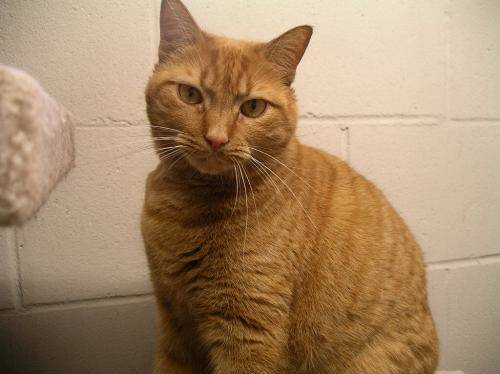

In [86]:
# 고양이사진
imgData = image.load_img('image/cat/cat1.jpg')
imgData

In [87]:
type(imgData)

PIL.JpegImagePlugin.JpegImageFile

In [88]:
# rgb값 255로 스케일
dataGen = image.ImageDataGenerator(rescale=1./255)

In [89]:
trainGen= dataGen.flow_from_directory('image',target_size=(98,98))

Found 20 images belonging to 2 classes.


In [90]:
type(trainGen)

keras.preprocessing.image.DirectoryIterator

In [91]:
x_train,y_train = trainGen.next()

In [92]:
x_train.shape , y_train.shape

((20, 98, 98, 3), (20, 2))

In [93]:
x_train

array([[[[0.3019608 , 0.27450982, 0.20392159],
         [0.30980393, 0.28235295, 0.21176472],
         [0.3137255 , 0.28627452, 0.21568629],
         ...,
         [0.18431373, 0.16078432, 0.16078432],
         [0.18431373, 0.16078432, 0.16078432],
         [0.16862746, 0.14509805, 0.14509805]],

        [[0.2901961 , 0.2627451 , 0.19215688],
         [0.29411766, 0.26666668, 0.19607845],
         [0.29411766, 0.26666668, 0.19607845],
         ...,
         [0.25882354, 0.23529413, 0.23529413],
         [0.25490198, 0.23137257, 0.23137257],
         [0.20392159, 0.18039216, 0.18039216]],

        [[0.28235295, 0.25490198, 0.18431373],
         [0.28235295, 0.25490198, 0.18431373],
         [0.28235295, 0.25490198, 0.18431373],
         ...,
         [0.16078432, 0.13725491, 0.13725491],
         [0.1764706 , 0.15294118, 0.15294118],
         [0.19215688, 0.16862746, 0.16862746]],

        ...,

        [[0.5411765 , 0.46274513, 0.33333334],
         [0.52156866, 0.43529415, 0.34117648]

In [94]:
y_train #  oh 인코딩

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

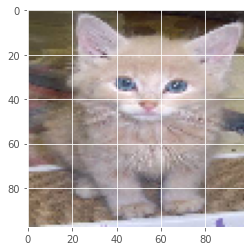

In [95]:
plt.imshow(x_train[0])

In [96]:
# 분류값 확인
trainGen.class_indices

{'cat': 0, 'dog': 1}

In [97]:
 x_train.reshape(20, -1)

array([[0.3019608 , 0.27450982, 0.20392159, ..., 0.7843138 , 0.8000001 ,
        0.91372555],
       [0.89019614, 0.92549026, 0.9607844 , ..., 0.34901962, 0.5372549 ,
        0.33333334],
       [0.12156864, 0.12156864, 0.07450981, ..., 0.1137255 , 0.09803922,
        0.05490196],
       ...,
       [0.2509804 , 0.4156863 , 0.16470589, ..., 0.58431375, 0.7490196 ,
        0.34901962],
       [0.00784314, 0.10196079, 0.0509804 , ..., 0.1764706 , 0.19607845,
        0.07843138],
       [0.32156864, 0.36862746, 0.2901961 , ..., 0.3803922 , 0.34117648,
        0.34509805]], dtype=float32)

In [98]:
x_train.shape 

(20, 98, 98, 3)

In [99]:
# flatten 쓰면 인코딩 안해도됨. 3차원 데이터
model = Sequential()
model.add(Flatten(input_shape = (98,98,3)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=2,  activation='softmax' )  )

# model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train,epochs=50)
h = model.fit(x_train, y_train,epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 297ms/step - loss: 0.7327 - acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 6.4933 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 4.1272 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 1.5896 - acc: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 1.8361 - acc: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 1.9970 - acc: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 0.7019 - acc: 0.6000
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 1.1953 - acc: 0.5500
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 1.6500 - acc: 0.5500
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.8444 - acc: 0.6500
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 0.3979 - acc: 0.

1/1 [==============================] - 0s 4ms/step - loss: 0.0045 - acc: 1.0000
Epoch 41/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0045 - acc: 1.0000
Epoch 42/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0044 - acc: 1.0000
Epoch 43/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0043 - acc: 1.0000
Epoch 44/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0043 - acc: 1.0000
Epoch 45/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0042 - acc: 1.0000
Epoch 46/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0042 - acc: 1.0000
Epoch 47/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - acc: 1.0000
Epoch 48/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0041 - acc: 1.0000
Epoch 49/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0040 - acc: 1.0000
Epoch 50/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0040 - acc: 1.0000


In [100]:

model.save('catdog.h5')
# h5는 모델 압축 파일


# model.save("model.h5")
# print("Saved model to disk")

# 해당 코드가 

# 연습

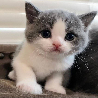

In [101]:
testImg = image.load_img('image/test.jpg',target_size=(98,98))
testImg

In [102]:
type(testImg)

PIL.Image.Image

In [103]:
imgArr = image.img_to_array(testImg) #  넘파이 배열로 만듦
imgArr = imgArr/255   #  스케일링

In [104]:
imgArr.shape

(98, 98, 3)

In [105]:
model.predict(imgArr.reshape(1,98,98,3)).argmax(axis=1)

array([1], dtype=int64)

In [106]:
# 피클 
import pickle
fp = open('catdog.history','wb')
pickle.dump(h.history,fp)
fp.close()

In [107]:
import shelve
sh = shelve.open('myhist')
sh['myh'] = h.history
sh.close()

In [108]:
def mydecode(arg):
    my= []
    
    for p,l in arg:
        if p>0.5:
            my.append((p,'강아지'))
        else:
            my.append((l,'고양이'))
    return my
            

In [109]:
# 모델 예측
pred = model.predict(imgArr.reshape(1,98,98,3))
pred

array([[3.6435237e-04, 9.9963558e-01]], dtype=float32)

In [110]:
# 해독 
def mydecode(arg):
    my= []
    
    for p,l in arg:
        if p>0.5:
            my.append((p,'강아지'))
        else:
            my.append((l,'고양이'))
    return my
            

In [111]:
# 고양이로 예측됨.
mydecode(pred)

[(0.9996356, '고양이')]

# 오류
 module 'h5py' has no attribute 'File'  = > h5py uninstall하고 다시 install